In [2]:
%reload_ext autoreload
%autoreload 2

In [3]:
import matplotlib.pyplot as plt

import numpy as np

from mcopt.pipeline import Pipeline
import mcopt.pipeline.util as util
from mcopt import MorseGraph, ot

In [4]:
pipeline = Pipeline('../pipeline.config.json')

wind = pipeline.graph('wind')

> Loading wind complex
  config unchanged, reading complex


> Loading wind graph


In [5]:
cmap = 'cool'
dist = 'geo'
hist = 'degree'

In [6]:
src = wind.frames[0]
dests = wind.frames[1:]

In [8]:
couplings = []
m = 0.82

src_net = src.to_mpn(hist=hist, dist=dist)

for dest in dests:
  dest_net = dest.to_mpn(hist=hist, dist=dist)
  
  M = MorseGraph.attribute_cost_matrix(src, dest)
  
  coupling, _ = ot.fpGW(src_net, dest_net, m, M)
  
  couplings.append((coupling, m))

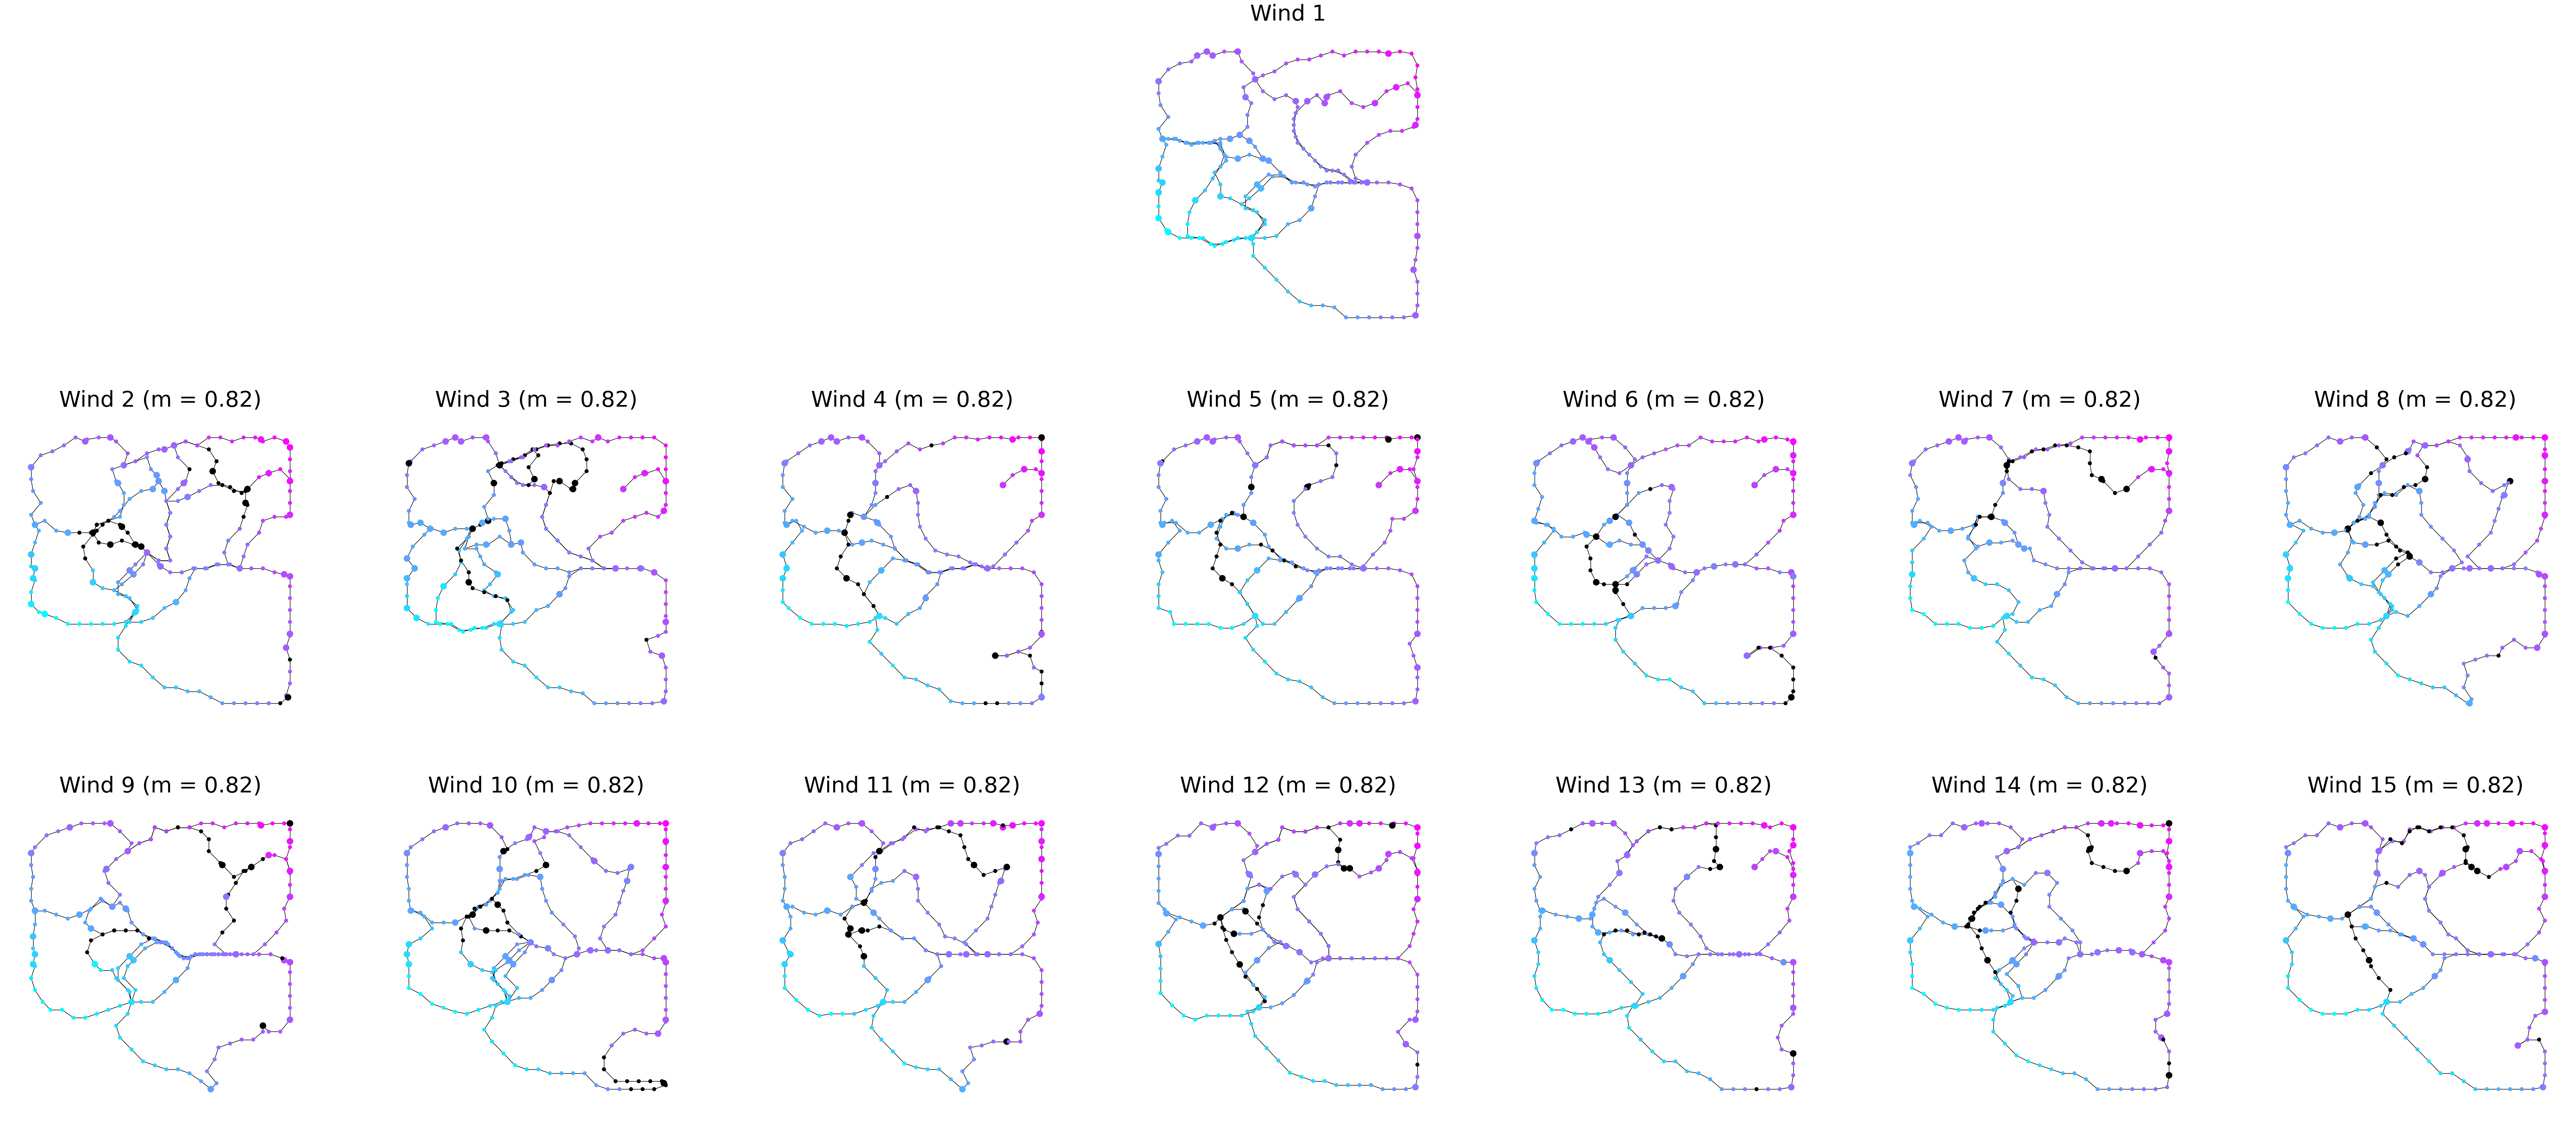

In [9]:
w, h = 7, 2
h += 1

fig, axes = plt.subplots(h, w, figsize=(w * 12, h * 12))

for ax in axes.ravel():
  ax.set_axis_off()

src_node_color = src.node_color_by_position()
src.draw(
  ax=axes[0, w//2],
  cmap=cmap
)
axes[0, w//2].set_title('Wind 1', fontsize=40)
  
for i, (dest, (coupling, m), ax) in enumerate(zip(dests, couplings, axes.ravel()[w:])):
  dest.draw(
    ax=ax,
    cmap=cmap,
    node_color=dest.node_color_by_coupling(src_node_color, coupling)
  )
  ax.set_title(f'Wind {i + 2} (m = {m})', fontsize=40)

In [10]:
ms = [1, 1, 0.88, 0.96, 0.93, 0.85, 0.95, 0.96, 0.91, 0.98, 0.98, 0.97, 0.96, 0.95]

couplings = []

src_net = src.to_mpn(hist=hist, dist=dist)

for m, dest in zip(ms, dests):
  dest_net = dest.to_mpn(hist=hist, dist=dist)
  
  M = MorseGraph.attribute_cost_matrix(src, dest)
  
  if np.isclose(m, 1):
    coupling, _ = ot.fGW(src_net, dest_net, M)
  else:
    coupling, _ = ot.fpGW(src_net, dest_net, m, M)
  
  couplings.append((coupling, m))

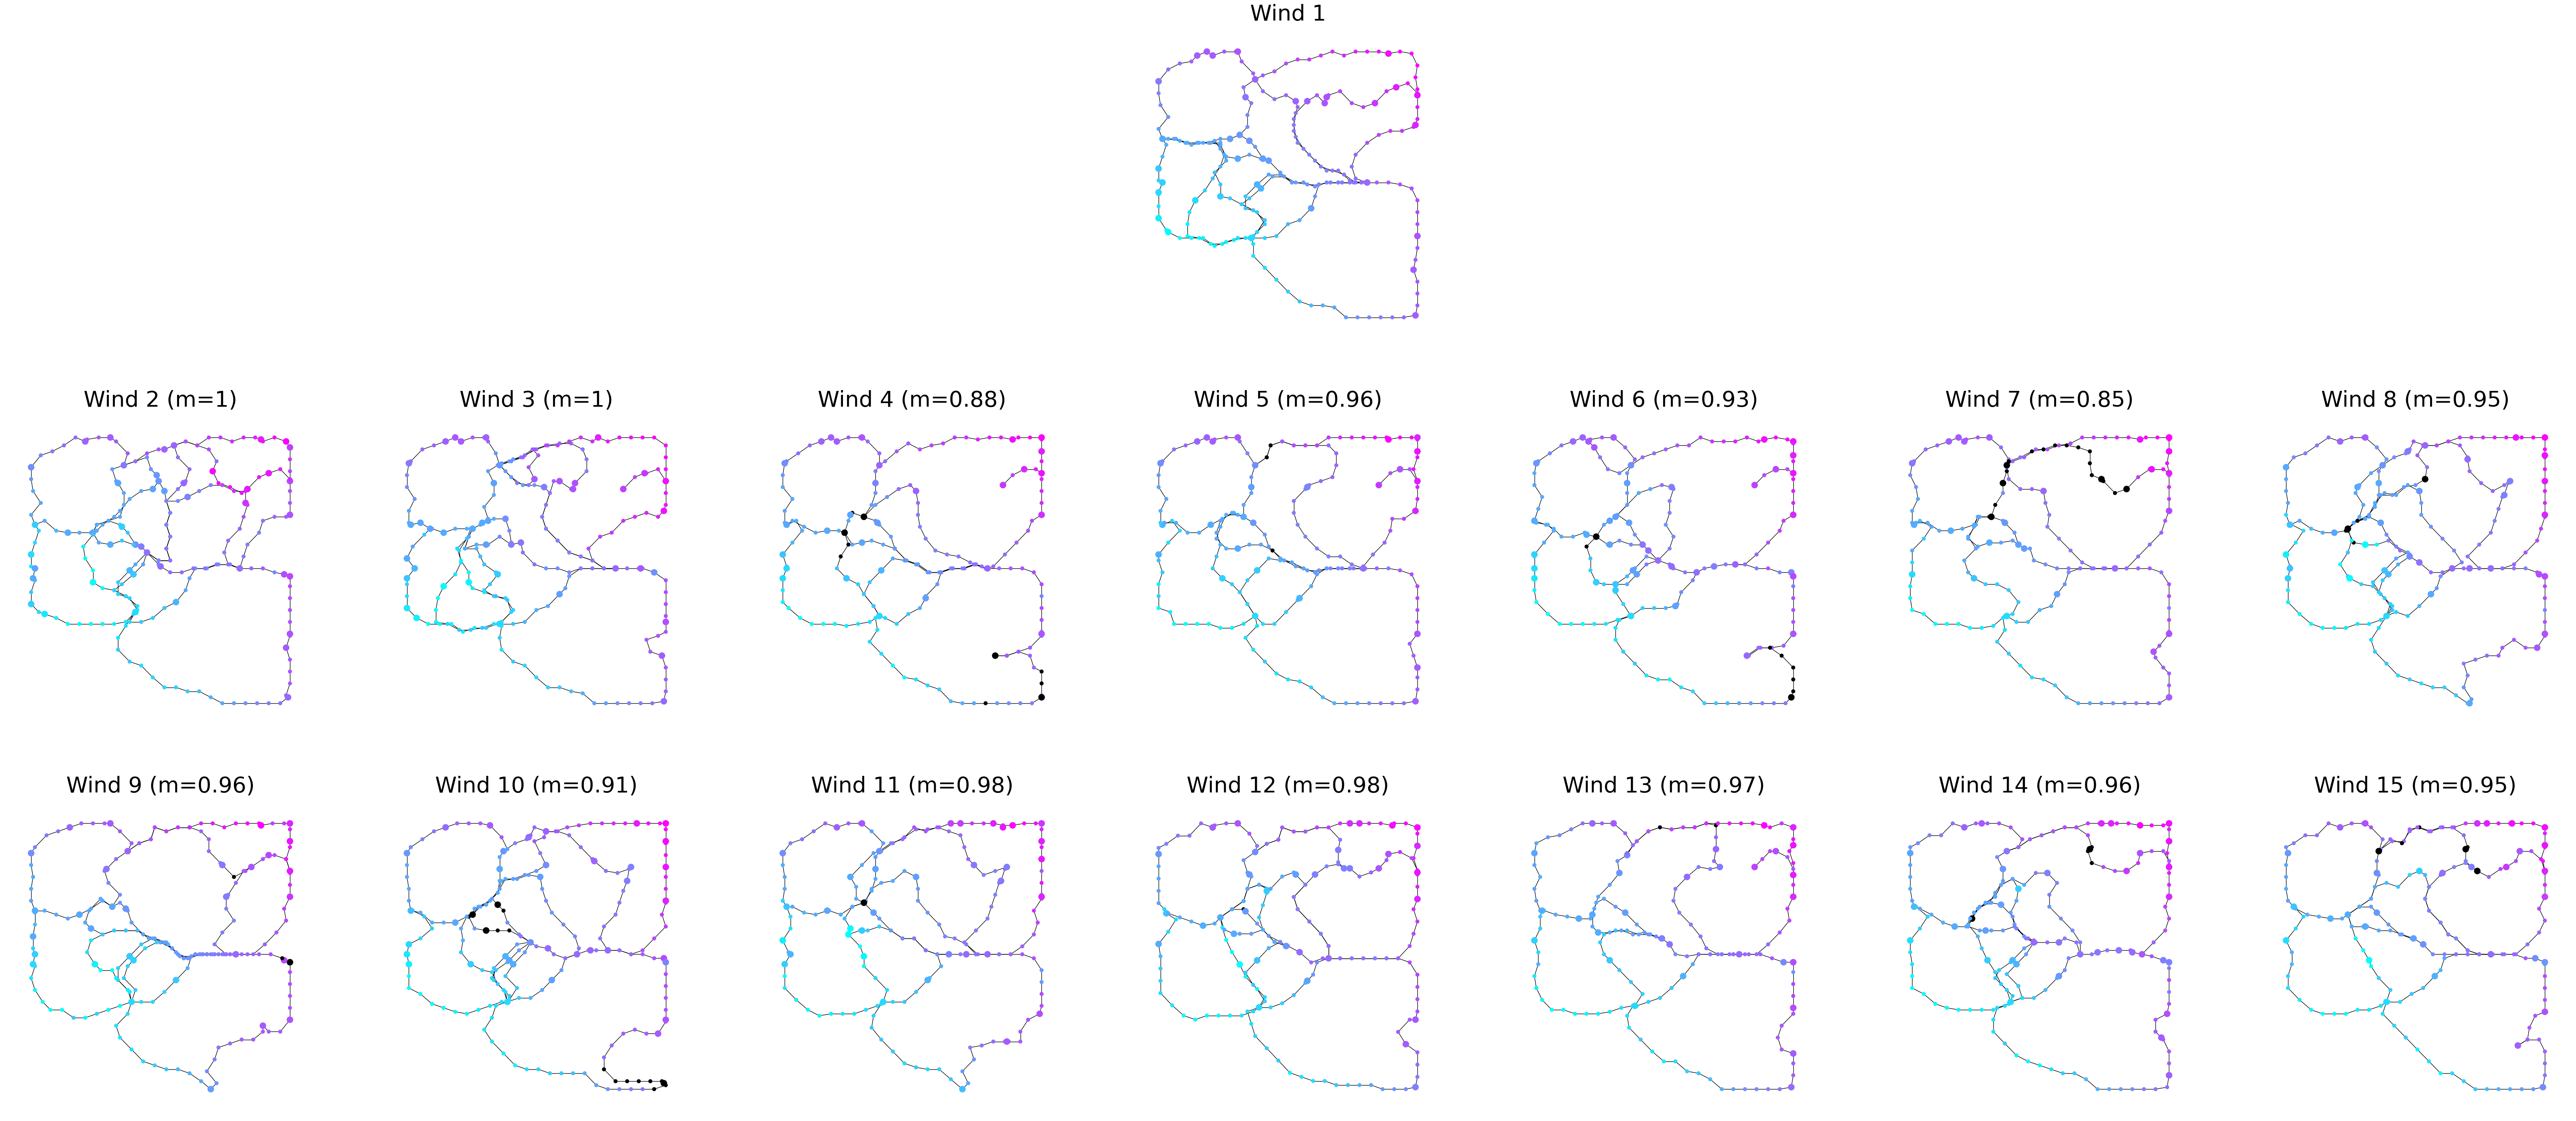

In [12]:
w, h = 7, 2
h += 1

fig, axes = plt.subplots(h, w, figsize=(w * 12, h * 12))

for ax in axes.ravel():
  ax.set_axis_off()

src_node_color = src.node_color_by_position()
src.draw(
  ax=axes[0, w//2],
  cmap=cmap
)
axes[0, w//2].set_title('Wind 1', fontsize=40)
  
for i, (dest, (coupling, m), ax) in enumerate(zip(dests, couplings, axes.ravel()[w:])):
  dest.draw(
    ax=ax,
    cmap=cmap,
    node_color=dest.node_color_by_coupling(src_node_color, coupling)
  )
  ax.set_title(f'Wind {i + 2} (m={m})', fontsize=40)